# PYPIT versus LowRedux for LRISr

In [2]:
%matplotlib inline

In [3]:
# imports
from scipy import stats
from astropy.io import fits
#
from linetools.spectra import io as lsio
from linetools.spectra.xspectrum1d import XSpectrum1D
# 
import matplotlib as mpl
mpl.rcParams['font.family'] = 'stixgeneral'
mpl.rc('xtick', labelsize=18) 
mpl.rc('ytick', labelsize=18) 
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec

# debugger
try:
    from xastropy.xutils import xdebug as debugger
except:
    import pdb as debugger

In [4]:
dpath = '/Users/xavier/PYPIT/Tiffany/lris_red/'

In [5]:
slitb = [20,250,500,1500]

## Load 1D Images

### PYPIT

In [6]:
spec1d = dpath+'Science/spec1d_OFF_J1044p6306_LRISr_2016Feb16T112439.fits'
hdu_spec = fits.open(spec1d)
hdu_spec.info()

Filename: /Users/xavier/PYPIT/Tiffany/lris_red/Science/spec1d_OFF_J1044p6306_LRISr_2016Feb16T112439.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU      21   ()              
1    O983-S8787-D01-I0022  BinTableHDU     27   2048R x 9C   [D, D, K, D, D, D, D, D, D]   
2    O403-S8787-D01-I0022  BinTableHDU     27   2048R x 9C   [D, D, K, D, D, D, D, D, D]   
3    O643-S8787-D01-I0022  BinTableHDU     27   2048R x 9C   [D, D, K, D, D, D, D, D, D]   
4    O077-S8787-D01-I0022  BinTableHDU     27   2048R x 9C   [D, D, K, D, D, D, D, D, D]   
5    O782-S8787-D01-I0022  BinTableHDU     27   2048R x 9C   [D, D, K, D, D, D, D, D, D]   
6    O239-S8787-D01-I0022  BinTableHDU     27   2048R x 9C   [D, D, K, D, D, D, D, D, D]   
7    O240-S1470-D02-I0022  BinTableHDU     27   2048R x 9C   [D, D, K, D, D, D, D, D, D]   
8    O082-S1470-D02-I0022  BinTableHDU     27   2048R x 9C   [D, D, K, D, D, D, D, D, D]   
9    O650-S1470-D02-I0022  BinTableHDU     27 

In [7]:
pypit_spec = Table(hdu_spec[7].data)
pypit_spec

obj_trace,box_var,box_mask,box_counts,box_sky,box_wave,opt_var,opt_counts,opt_wave
float64,float64,int64,float64,float64,float64,float64,float64,float64
72.6640134378,610.744345727,2,36.4807070288,23.9804511811,5550.39962802,4435.80975027,28.2357940108,5550.39962802
72.6629145728,635.313166856,2,61.1004861736,25.5160025016,5551.93928249,4472.57204253,48.8020594641,5551.93928249
72.6618174328,701.535690609,2,37.251115949,29.6549102362,5553.47893697,4485.13761797,22.7232175578,5553.47893697
72.6607220179,651.24066657,2,22.4790414298,26.5114712338,5555.01859144,4453.60319103,26.34891079,5555.01859144
72.659628328,639.206665747,2,37.3630735799,25.7593461824,5556.55827248,4450.37282546,33.2459546629,5556.55827248
72.658536363,623.468659521,2,-19.5520304251,24.7757207933,5558.09808335,4466.76808067,21.1848167128,5558.09808335
72.6574461229,588.874126169,2,71.9038408724,22.6135624587,5559.63802393,4432.74671928,47.5575316031,5559.63802393
72.6563576077,642.374206808,2,6.50680099259,25.9573174987,5561.17809412,4427.49671954,2.00033381942,5561.17809412
72.6552708174,592.78593706,2,52.60963338,22.8580506394,5562.71829382,4406.6709906,24.766420276,5562.71829382


### LowRedux

In [8]:
low_file = dpath+'LowRedux/Science/Good/sci-LR.20160216.40478.fits.gz'
lrdx_scihdu = fits.open(low_file)
sciobj = Table(lrdx_scihdu[5].data)[1] # Might have to deal with more than one obj
sciobj

OBJID,SLITID,XFRACPOS,PEAKFLUX,MASKWIDTH,FWHM,FLX_SHFT_WAV,FLX_SHFT_SPA,FWHMFIT [2048],XPOS [2048],YPOS [2048],HAND_AP,HAND_X,HAND_Y,HAND_MINX,HAND_MAXX,HAND_FWHM,HAND_SUB,WAVE_OPT [2048],FLUX_OPT [2048],SIVAR_OPT [2048],IVAR_OPT [2048],SKY_OPT [2048],RN_OPT [2048],NIVAR_OPT [2048],MASK_OPT [2048],FRAC_USE [2048],CHI2 [2048],WAVE_BOX [2048],FLUX_BOX [2048],SIVAR_BOX [2048],IVAR_BOX [2048],NIVAR_BOX [2048],SKY_BOX [2048],RN_BOX [2048],MASK_BOX [2048],MINCOL,MAXCOL,BOX_RAD,ARC_FWHM_FIT [2048],ARC_FWHM_MED,PIX_RES,BINNING [2]
int32,int32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int32,float32,float32,float32,float32,float32,int32,float64,float32,float32,float32,float32,float32,float32,uint8,float32,float32,float64,float32,float32,float32,float32,float32,float32,uint8,int32,int32,int16,float32,float64,float64,int32
2,2,0.216852,6.23647,15.5982,4.30155,-2.86,2.84461,4.30155 .. 4.30155,1096.06 .. 1100.45,0.0 .. 2047.0,0,0.0,0.0,0.0,0.0,0.0,0,5549.80510643 .. 8823.50327391,58.6318 .. 17759.1,0.00478168 .. 1.55874e-06,0.00478168 .. 1.55874e-06,169.427 .. 127761.0,10.1025 .. 35.5914,0.00455124 .. 1.54707e-06,1 .. 1,1.0 .. 0.0146676,2.21654 .. 2.42387,5549.80238388 .. 8823.50236966,111.229 .. -11647.2,0.00237338 .. 4.06279e-05,0.00237338 .. 4.06279e-05,0.00237338 .. 4.06279e-05,366.315 .. 16251.5,14.8544 .. 12.6842,1 .. 1,1066,1131,7,2.45206 .. 1.65603,2.35545873642,2.35545873642,2 .. 2


## Load 2D Images

### PYPIT

In [17]:
spec2d = dpath+'Science/spec2d_OFF_J1044p6306_LRISr_2016Feb16T112439.fits'
hdu = fits.open(spec2d)
print(hdu.info())
pypit_var = hdu[5].data # Detector 2
pypit_skysub = hdu[6].data # Detector 2

Filename: /Users/xavier/PYPIT/Tiffany/lris_red/Science/spec2d_OFF_J1044p6306_LRISr_2016Feb16T112439.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU      10   ()              
1    DET1-PROCESSED  ImageHDU         8   (1024, 2048)   float64   
2    DET1-VAR    ImageHDU         8   (1024, 2048)   float64   
3    DET1-SKYSUB  ImageHDU         8   (1024, 2048)   float64   
4    DET2-PROCESSED  ImageHDU         8   (1024, 2048)   float64   
5    DET2-VAR    ImageHDU         8   (1024, 2048)   float64   
6    DET2-SKYSUB  ImageHDU         8   (1024, 2048)   float64   
None


### LowRedux

In [10]:
lwrdx_wavefile = dpath+'LowRedux/wave-LR.20160216.05529.fits'
lwrdx_wave = fits.open(lwrdx_wavefile)[0].data
lwrdx_proc = lrdx_scihdu[0].data
lwrdx_ivar = lrdx_scihdu[1].data
lwrdx_sky = lrdx_scihdu[2].data

----

## Compare variance images (Detector 2)

In [18]:
var_rtio = pypit_var * np.roll(lwrdx_ivar,1,axis=1)[:,1024:]

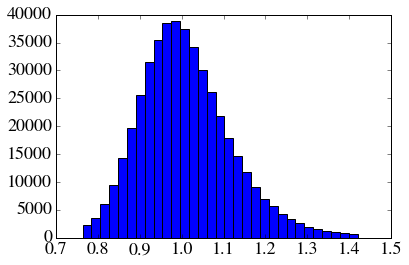

In [19]:
#debugger.ximshow(var_rtio)
debugger.xhist(var_rtio[:,slitb[0]:slitb[1]], xrng=[0.8, 1.4])#, binsz=0.01)

----

## Sky Subtraction at Slitb

### PYPIT

In [13]:
#debugger.ximshow(pypit_skysub)

In [14]:
pypit_resid = (pypit_skysub/np.sqrt(pypit_var))[slitb[2]:slitb[3],slitb[0]:slitb[1]]

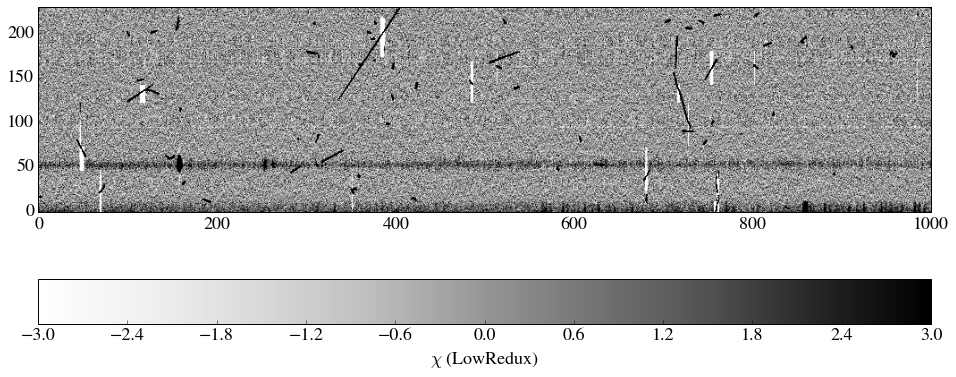

In [15]:
plt.clf()
plt.figure(figsize=(16,8))
#
cm = plt.get_cmap('Greys') 
mplt = plt.imshow(pypit_resid.T, origin='lower', cmap=cm)
mplt.set_clim(vmin=-3, vmax=3.)
cb = plt.colorbar(mplt,orientation='horizontal')
cb.set_label(r'$\chi$ (LowRedux)',fontsize=18.)
#
plt.show()
plt.close()

#### Streaks are due to bad sky sub in PYPIT

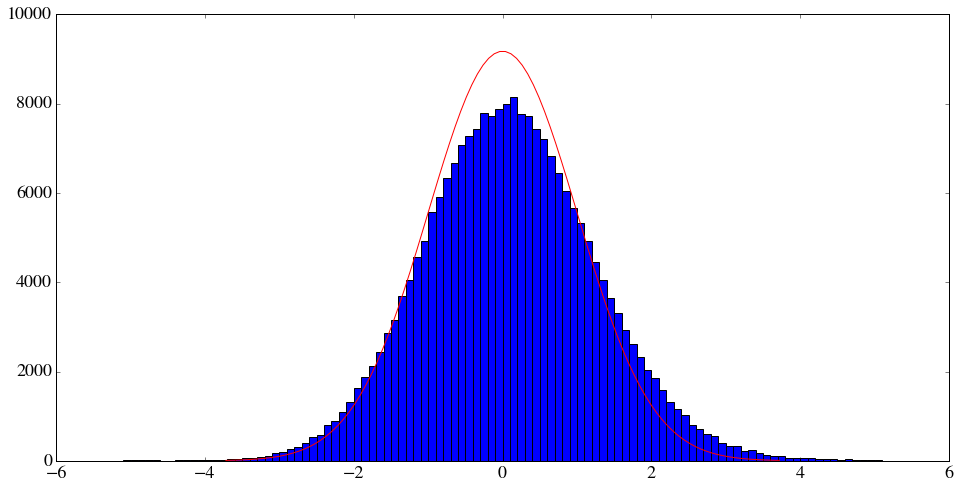

In [16]:
binsz = 0.1
plt.clf()
plt.figure(figsize=(16,8))
ax = plt.gca()
debugger.xhist(pypit_resid,xrng=[-5,5],binsz=binsz,ax=ax)
# PDF for Gaussian
#area = lwrdx_chi.size * binsz
area=pypit_resid.size*binsz
xppf = np.linspace(stats.norm.ppf(0.0001), stats.norm.ppf(0.9999), 100)
yppf = area*stats.norm.pdf(xppf)
ax.plot(xppf, yppf, 'r-', alpha=1.0)
plt.show()

----

## Sky spectrum (wavelength check)

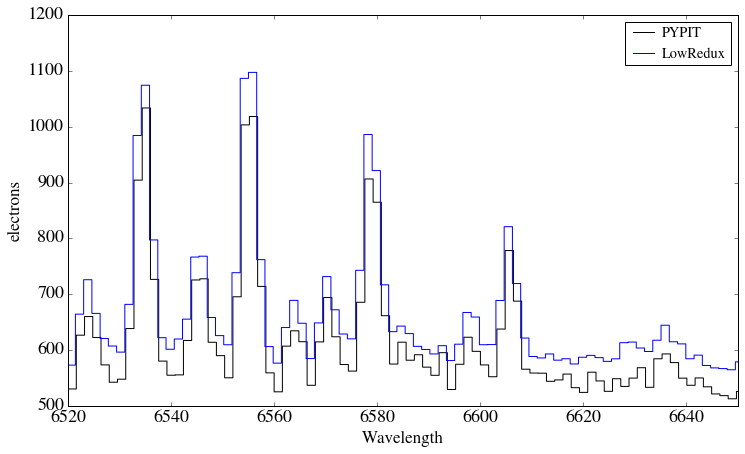

In [43]:
plt.clf()
plt.figure(figsize=(12,7))
ax = plt.gca()

# PYPIT
ax.plot(pypit_spec['box_wave'], pypit_spec['box_sky']*6, 'k-', drawstyle='steps-mid',label='PYPIT')
# LowRedux
ax.plot(sciobj['WAVE_OPT'], sciobj['SKY_OPT'], '-', color='blue',label='LowRedux', drawstyle='steps-mid')
# Axes
#ax.set_xlim(6720.,6790.)#np.min(pypit_spec['opt_wave']), np.max(pypit_spec['opt_wave']))
ax.set_xlim(6520.,6650.)#np.min(pypit_spec['opt_wave']), np.max(pypit_spec['opt_wave']))

ax.set_ylim(500.,1200)
ax.set_xlabel('Wavelength',fontsize=17.)
ax.set_ylabel('electrons',fontsize=17.)
# Legend
legend = plt.legend(loc='upper right', borderpad=0.3,
            handletextpad=0.3, fontsize='x-large')
# Finish
plt.show()
plt.close()

----

## Trace

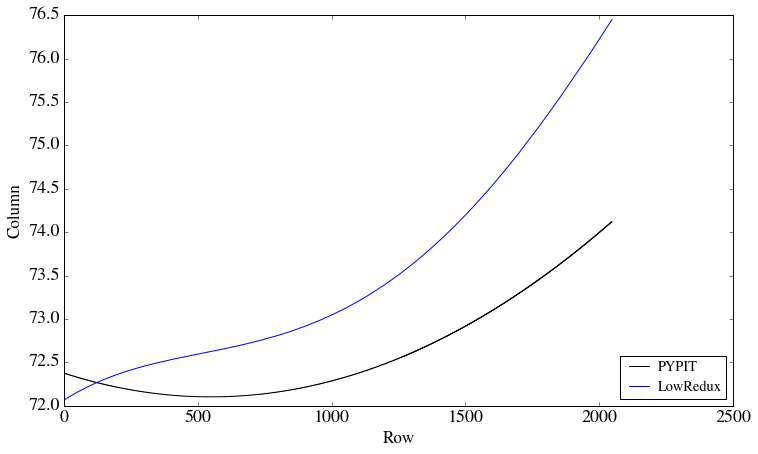

In [18]:
plt.clf()
plt.figure(figsize=(12,7))
ax = plt.gca()
# PYPIT
ax.plot(pypit_spec['obj_trace'], 'k-', drawstyle='steps', label='PYPIT')
# LowRedux
ax.plot(sciobj['XPOS']-1024, '-', color='blue', label='LowRedux')
# Axes
#ax.set_ylim(0.,np.median(pys2n)*2.)
ax.set_xlabel('Row',fontsize=17.)
ax.set_ylabel('Column',fontsize=17.)
# Legend
legend = plt.legend(loc='lower right', borderpad=0.3,
            handletextpad=0.3, fontsize='x-large')
# Finish
plt.show()
plt.close()

#### LowRedux looks better by eye

----

## Boxcar Extraction

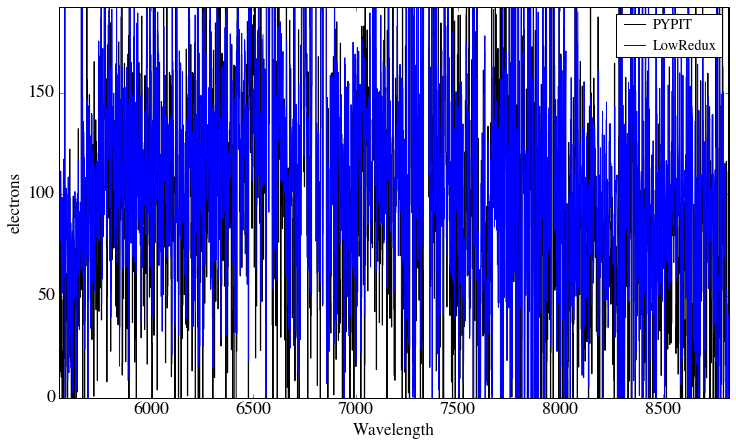

In [19]:
plt.clf()
plt.figure(figsize=(12,7))
ax = plt.gca()
ymax = np.median(pypit_spec['box_counts'])*2.
# PYPIT
ax.plot(pypit_spec['box_wave'], pypit_spec['box_counts'], 'k-', drawstyle='steps',label='PYPIT')
#ax.plot(pypit_boxspec.dispersion, pypit_boxspec.sig, 'g-', drawstyle='steps')
# LowRedux
ax.plot(sciobj['WAVE_BOX'], sciobj['FLUX_BOX'], '-', color='blue',label='LowRedux')
#ax.plot(lwrdx_boxspec.dispersion, lwrdx_boxspec.sig, '-', color='gray')
# Axes
ax.set_xlim(np.min(pypit_spec['box_wave']), np.max(pypit_spec['box_wave']))
ax.set_ylim(0.,ymax)
#ax.set_xlim(6720.,6790.)
#ax.set_ylim(0.,800)
ax.set_xlabel('Wavelength',fontsize=17.)
ax.set_ylabel('electrons',fontsize=17.)
# Legend
legend = plt.legend(loc='upper right', borderpad=0.3,
            handletextpad=0.3, fontsize='x-large')
# Finish
plt.show()
plt.close()

## Optimal Extraction

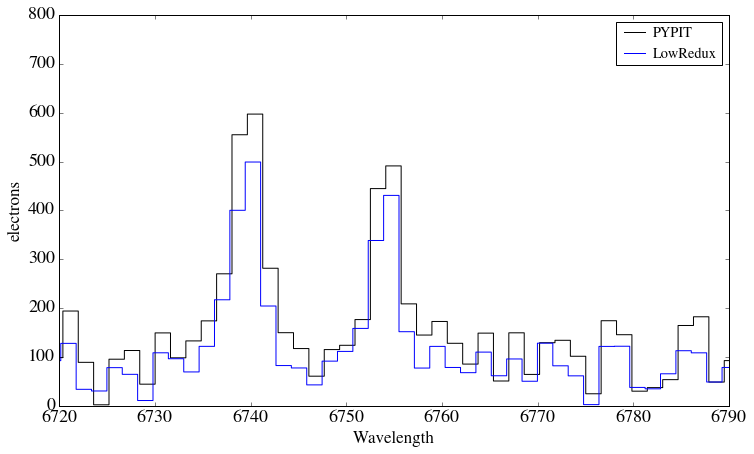

In [47]:
srt = np.argsort(pypit_spec['opt_wave'])
plt.clf()
plt.figure(figsize=(12,7))
ax = plt.gca()
#ymax = np.median(pypit_spec['opt_counts'])#*10.
# PYPIT
#ax.plot(pypit_spec['opt_wave'][srt], pypit_spec['opt_counts'][srt], 'k-', drawstyle='steps',label='PYPIT')
ax.plot(pypit_spec['opt_wave'], pypit_spec['opt_counts'], 'k-', drawstyle='steps-mid',label='PYPIT')
#ax.plot(pypit_spec['box_wave'], pypit_spec['box_counts'], 'k-', drawstyle='steps-mid',label='PYPIT')

#ax.scatter(pypit_spec['opt_wave'], pypit_spec['opt_counts'], label='PYPIT')
#ax.plot(pypit_boxspec.dispersion, pypit_boxspec.sig, 'g-', drawstyle='steps')
# LowRedux
ax.plot(sciobj['WAVE_OPT'], sciobj['FLUX_OPT'], '-', color='blue',label='LowRedux', drawstyle='steps-mid')
#ax.plot(lwrdx_boxspec.dispersion, lwrdx_boxspec.sig, '-', color='gray')
# Axes
ax.set_xlim(6720.,6790.)#np.min(pypit_spec['opt_wave']), np.max(pypit_spec['opt_wave']))
#ax.set_xlim(6520.,6650.)#np.min(pypit_spec['opt_wave']), np.max(pypit_spec['opt_wave']))

ax.set_ylim(0.,800)
ax.set_xlabel('Wavelength',fontsize=17.)
ax.set_ylabel('electrons',fontsize=17.)
# Legend
legend = plt.legend(loc='upper right', borderpad=0.3,
            handletextpad=0.3, fontsize='x-large')
# Finish
plt.show()
plt.close()

### Versus boxcar (PYPIT)

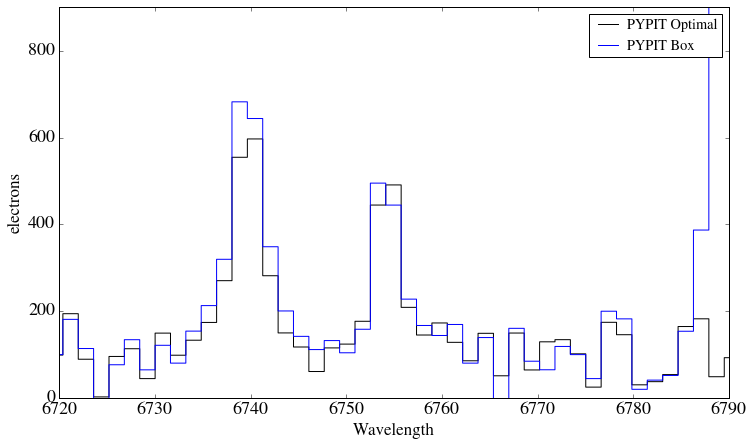

In [48]:
plt.clf()
plt.figure(figsize=(12,7))
ax = plt.gca()
ymax = np.median(pypit_spec['opt_counts'])*10.
# PYPIT optimal
srt = np.argsort(pypit_spec['opt_wave'])
ax.plot(pypit_spec['opt_wave'][srt], pypit_spec['opt_counts'][srt], 'k-', drawstyle='steps-mid',label='PYPIT Optimal')
# PYPIT boxcar
srtb = np.argsort(pypit_spec['box_wave'])
ax.plot(pypit_spec['box_wave'][srtb], pypit_spec['box_counts'][srtb], 'b-', drawstyle='steps-mid',label='PYPIT Box')
#ax.plot(pypit_boxspec.dispersion, pypit_boxspec.sig, 'g-', drawstyle='steps')
# Axes
ax.set_xlim(6720.,6790.)#np.min(pypit_spec['opt_wave']), np.max(pypit_spec['opt_wave']))
ax.set_ylim(0.,ymax)
ax.set_xlabel('Wavelength',fontsize=17.)
ax.set_ylabel('electrons',fontsize=17.)
# Legend
legend = plt.legend(loc='upper right', borderpad=0.3,
            handletextpad=0.3, fontsize='x-large')
# Finish
plt.show()
plt.close()